# `clust-learn` - Module 2: Dimensionality reduction

This guide shows how to use the `dimensionality_reduction` module of the `clust-learn` package to reduce dimensionality of mixed-type data.

## 0. Setup

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from clearn.dimensionality_reduction import DimensionalityReduction
from clearn.dimensionality_reduction.viz_utils import plot_compare_pca_based_components

pd.set_option('display.float_format', lambda x: '%.4f' % x,
              'display.max_columns', None,
              'display.max_colwidth', None)

C:\Users\Miguel\anaconda3\lib\site-packages\outdated\utils.py:14: OutdatedPackageWarning: The package outdated is out of date. Your version is 0.2.1, the latest is 0.2.2.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(


## 1. Data loading

In [2]:
df = pd.read_csv('data/pisa_spain_sample_v2_preprocess_ouput.csv')
df.head()

,stu_original_order,ST004D01T,IMMIG,REPEAT,AGE,PAREDINT,BMMJ1,BFMJ2,HISEI,DURECEC,BSMJ,MMINS,LMINS,SMINS,TMINS,FCFMLRTY,SCCHANGE,CHANGE,STUBMI,ESCS,UNDREM,METASUM,METASPAM,ICTHOME,ICTSCH,HOMEPOS,CULTPOSS,HEDRES,WEALTH,ICTRES,DISCLIMA,TEACHSUP,DIRINS,PERFEED,EMOSUPS,STIMREAD,ADAPTIVITY,TEACHINT,JOYREAD,SCREADCOMP,SCREADDIFF,PERCOMP,PERCOOP,ATTLNACT,COMPETE,WORKMAST,GFOFAIL,EUDMO,SWBP,RESILIENCE,MASTGOAL,GCSELFEFF,GCAWARE,ATTIMM,INTCULT,PERSPECT,COGFLEX,RESPECT,AWACOM,GLOBMIND,DISCRIM,BELONG,BEINGBULLIED,ENTUSE,HOMESCH,USESCH,INTICT,COMPICT,AUTICT,SOIAICT,ICTCLASS,ICTOUTSIDE,INFOCAR,INFOJOB1,INFOJOB2,FLCONFIN,FLCONICT,FLSCHOOL,FLFAMILY,BODYIMA,SOCONPA,W_FSTUWT
0,8270,2.0000,1.0000,0.0000,15.7500,12.0000,54.5500,29.1800,54.5500,2.0000,51.5000,220.0000,220.0000,0.0000,1650.0000,5.0000,0.0000,0.0000,17.3400,-0.8158,0.4500,0.5900,-1.4100,8.0000,6.0000,-1.3356,-0.7075,-1.0118,-0.8567,-1.5445,-1.0826,-1.1481,-0.7139,-1.6391,-0.6576,-1.3412,-0.2644,-1.0346,-0.4389,-0.5485,0.4090,-1.5580,-0.9391,1.0844,0.1956,0.2119,-0.9823,-0.6723,0.6502,-0.0614,-0.8444,-0.2721,-0.5368,-0.2312,-0.5669,-1.2740,-0.2417,-0.0540,-0.6937,-0.1115,-0.5252,0.3241,-0.7823,0.3473,-1.0143,0.6520,-0.7691,-0.6827,0.0979,-0.0316,2.4394,2.4969,-0.0393,-0.9778,0.8028,-0.5238,-0.5294,1.0775,-0.3855,0.6666,-2.0063,9.1296
1,18270,1.0000,3.0000,1.0000,15.7500,3.0000,-2.5432,3.2451,0.2911,3.0000,75.1300,220.0000,220.0000,110.0000,1650.0000,6.0000,0.0000,0.0000,22.3200,-2.7449,-0.9400,-1.3400,1.3300,7.0000,3.0000,-0.4448,-0.5491,-0.6853,0.1307,-0.8794,0.2108,1.3140,0.7198,-0.3253,-0.6576,-0.1030,1.1853,-0.2934,-0.8176,-0.5485,0.4090,-0.6142,-0.9391,-0.6583,0.1956,-0.4540,0.4637,-0.1652,-0.5928,-0.0614,-1.3162,-0.2302,-0.6113,1.4992,-0.6110,-0.2045,-0.2417,0.9289,-0.4506,-0.9188,0.5881,-0.3184,-0.7823,0.2442,0.5541,0.4602,0.0012,1.0371,-0.2274,-0.7345,-0.0395,-0.4036,-1.1554,-0.9778,-0.4913,0.1489,-0.5294,-1.5638,-0.5754,0.8357,0.7405,6.2621
2,31863,2.0000,1.0000,1.0000,16.0800,14.5000,46.7600,17.5600,46.7600,3.0000,56.5700,220.0000,165.0000,110.0000,1760.0000,4.0000,0.0000,0.0000,23.3900,0.0050,1.1500,0.5900,1.3300,9.0000,5.0000,0.0075,0.5143,-0.6853,-0.0741,-0.3490,0.2377,-0.6262,-0.1803,-0.6555,0.2127,-0.9225,-0.1716,0.1744,-0.9016,-0.9323,-0.0362,-0.9514,-0.3047,0.0083,1.1811,-0.3599,-1.0109,-0.2670,1.2386,0.0210,-1.2137,1.3434,-0.0549,-0.2014,-0.6544,-0.1160,1.4543,0.9289,-0.5340,0.1330,0.9385,0.4766,-0.7823,-0.0976,-0.4798,-0.7578,-0.0186,0.1782,0.0979,0.7595,0.5207,0.7709,-0.0393,-0.8851,-0.0474,-0.6826,-0.3051,-0.6368,0.3276,0.8357,0.0157,28.6717
3,31473,1.0000,1.0000,0.0000,15.6700,14.5000,29.7300,42.3000,42.3000,3.0000,70.1000,200.0000,200.0000,150.0000,1500.0000,3.0000,0.0000,0.0000,19.6800,-0.3694,1.1500,0.2100,0.8700,9.0000,8.0000,-0.6764,-0.8404,-0.6853,-0.3370,-0.3490,0.5156,1.3140,0.4301,0.0728,0.3622,0.2464,0.5464,0.1744,2.6131,1.2374,-0.6311,-1.5580,0.6012,1.0844,-0.9792,1.7124,1.8905,1.3480,1.2386,2.3693,-0.2151,0.8550,-0.1355,1.4992,0.2865,0.8790,0.2165,0.9289,2.0513,2.0049,-1.1549,1.4326,-0.7823,-0.3210,-0.1448,0.7629,-0.7386,1.1228,0.8975,-0.8425,0.2861,-0.3140,0.2442,-0.8851,-0.0474,-1.4144,-1.2972,-0.9888,2.4020,-0.5858,0.9078,10.4210
4,27565,1.0000,3.0000,0.0000,15.4200,16.0000,29.4700,25.0600,29.4700,2.0000,43.8500,240.0000,180.0000,180.0000,1620.0000,7.0000,1.0000,1.0000,22.7600,-0.4881,1.5000,1.3600,1.3300,7.0000,6.0000,-0.9474,-1.8115,-0.9779,-0.3628,-0.5742,-0.6633,-0.2023,-0.3280,-1.6391,-0.6439,0.3130,0.7368,1.8245,0.3703,-0.4419,-0.4160,2.0378,-0.9391,-1.4024,-1.7664,0.0273,-0.0845,-1.7389,-0.5928,-0.8474,-1.7101,-0.0903,0.8109,1.4992,1.6052,0.2828,-0.4951,0.9289,1.1430,-0.2535,-1.1549,-0.3184,0.6725,0.9361,0.2605,0.5758,1.3444,1.2754,0.4990,-0.4741,-0.2905,-0.5494,0.2442,0.1940,0.8028,-0.8071,0.8697,-0.0450,0.6916,-1.0908,-0.8992,37.3268


In [3]:
df.shape

(4241, 82)

We separate numerical and categorical variables.

In [4]:
num_vars = ['AGE', 'PAREDINT', 'BMMJ1',
       'BFMJ2', 'HISEI', 'DURECEC', 'BSMJ', 'MMINS',
       'LMINS', 'SMINS', 'TMINS', 'FCFMLRTY', 'SCCHANGE', 'CHANGE', 'STUBMI',
       'ESCS', 'UNDREM', 'METASUM', 'METASPAM', 'ICTHOME', 'ICTSCH', 'HOMEPOS',
       'CULTPOSS', 'HEDRES', 'WEALTH', 'ICTRES', 'DISCLIMA', 'TEACHSUP',
       'DIRINS', 'PERFEED', 'EMOSUPS', 'STIMREAD', 'ADAPTIVITY', 'TEACHINT',
       'JOYREAD', 'SCREADCOMP', 'SCREADDIFF', 'PERCOMP', 'PERCOOP', 'ATTLNACT',
       'COMPETE', 'WORKMAST', 'GFOFAIL', 'EUDMO', 'SWBP', 'RESILIENCE',
       'MASTGOAL', 'GCSELFEFF', 'GCAWARE', 'ATTIMM', 'INTCULT', 'PERSPECT',
       'COGFLEX', 'RESPECT', 'AWACOM', 'GLOBMIND', 'DISCRIM', 'BELONG',
       'BEINGBULLIED', 'ENTUSE', 'HOMESCH', 'USESCH', 'INTICT', 'COMPICT',
       'AUTICT', 'SOIAICT', 'ICTCLASS', 'ICTOUTSIDE', 'INFOCAR', 'INFOJOB1',
       'INFOJOB2', 'FLCONFIN', 'FLCONICT', 'FLSCHOOL', 'FLFAMILY', 'BODYIMA',
       'SOCONPA']
cat_vars = ['ST004D01T', 'IMMIG', 'REPEAT'] 

In [5]:
len(num_vars)+len(cat_vars)

80

## 2. Dimensionality reduction

### 2.1. Run dimensionality reduction

First, we instantiate the `DimensionalityReduction` class setting `num_algorithm='spca'` so that Sparse PCA is applied on numerical variables.

In [6]:
dr = DimensionalityReduction(df, num_vars=num_vars, cat_vars=cat_vars, num_algorithm='spca')

We set `min_explained_variance_ratio=None` so that the optimal number of components is calculated.

In [7]:
# We compute the optimal number of components
t = dr.transform(min_explained_variance_ratio=None)

In [8]:
dr.n_components_

14

In [9]:
dr.num_model

SparsePCA(n_components=13, random_state=42)

In [10]:
t.describe()

,dim_01,dim_02,dim_03,dim_04,dim_05,dim_06,dim_07,dim_08,dim_09,dim_10,dim_11,dim_12,dim_13,dim_14
count,4241.0000,4241.0000,4241.0000,4241.0000,4241.0000,4241.0000,4241.0000,4241.0000,4241.0000,4241.0000,4241.0000,4241.0000,4241.0000,4241.0000
mean,0.0000,-0.0000,-0.0000,0.0000,0.0000,0.0000,0.0000,-0.0000,-0.0000,-0.0000,-0.0000,-0.0000,0.0000,-0.0000
std,1.8519,1.8449,1.8436,1.6234,1.6067,1.6018,1.5874,1.5554,1.4764,1.4692,1.4170,1.3428,1.3040,0.6332
min,-6.1511,-8.0139,-5.8891,-4.8680,-5.1142,-5.7833,-5.3993,-6.8670,-4.9542,-6.9676,-5.2848,-1.1770,-5.9592,-0.4129
25%,-1.1892,-1.1354,-1.4982,-1.0838,-1.1177,-1.0699,-1.0178,-1.0036,-1.0116,-0.9194,-0.9003,-0.8264,-0.5876,-0.4129
50%,0.0264,0.0214,-0.0549,-0.0194,0.0150,0.0151,0.0943,-0.1660,-0.0204,0.0651,0.1567,-0.7302,-0.0998,-0.2810
75%,1.2620,1.1455,1.6061,1.0385,1.1336,1.0893,1.0776,0.8404,0.9778,0.9573,1.0402,0.9772,0.3403,0.5127
max,5.3213,8.3563,3.9318,6.2177,5.7639,4.7442,5.1785,6.4277,5.6889,4.4239,3.4567,6.4219,22.1720,2.2467


In [11]:
print(dr.num_components_, dr.cat_components_)

['dim_01', 'dim_02', 'dim_03', 'dim_04', 'dim_05', 'dim_06', 'dim_07', 'dim_08', 'dim_09', 'dim_10', 'dim_11', 'dim_12', 'dim_13'] ['dim_14']


We check that the regularization applied in SPCA and the fact that numerical and categorical variables are treated separately don't generate correlated components. We can see that most correlations are very low, with very few expections (9 pairs) showing a correlation above 0.2 in absolute value.

In [12]:
t.corr()

,dim_01,dim_02,dim_03,dim_04,dim_05,dim_06,dim_07,dim_08,dim_09,dim_10,dim_11,dim_12,dim_13,dim_14
dim_01,1.0000,-0.0311,-0.0282,-0.1610,0.2660,0.1435,-0.0150,0.0480,0.0855,-0.0630,0.0489,-0.0384,0.0407,0.0466
dim_02,-0.0311,1.0000,-0.3988,0.0686,-0.1573,-0.0966,0.1203,-0.0990,-0.0786,0.1153,-0.0168,0.0843,0.0186,0.2985
dim_03,-0.0282,-0.3988,1.0000,-0.0092,0.1048,0.0504,-0.1633,0.0217,0.0596,-0.0513,0.0942,-0.0436,-0.0637,-0.3163
dim_04,-0.1610,0.0686,-0.0092,1.0000,-0.1798,0.0089,-0.0003,-0.1592,0.0031,0.0356,0.0345,0.0454,-0.0298,-0.0199
dim_05,0.2660,-0.1573,0.1048,-0.1798,1.0000,0.3212,-0.1328,0.0894,0.1074,-0.0421,0.0489,-0.1272,0.0108,-0.1511
dim_06,0.1435,-0.0966,0.0504,0.0089,0.3212,1.0000,-0.2459,0.1371,0.1581,0.0601,0.0264,-0.0118,0.0064,-0.0565
dim_07,-0.0150,0.1203,-0.1633,-0.0003,-0.1328,-0.2459,1.0000,-0.1641,-0.2154,-0.0190,-0.0048,0.0335,0.0431,0.1715
dim_08,0.0480,-0.0990,0.0217,-0.1592,0.0894,0.1371,-0.1641,1.0000,0.1460,-0.0350,-0.0638,-0.0323,0.0132,-0.0162
dim_09,0.0855,-0.0786,0.0596,0.0031,0.1074,0.1581,-0.2154,0.1460,1.0000,-0.1940,-0.0818,0.0220,0.0143,-0.0720
dim_10,-0.0630,0.1153,-0.0513,0.0356,-0.0421,0.0601,-0.0190,-0.0350,-0.1940,1.0000,0.2218,-0.0397,-0.0398,0.0290


### 2.2. Explain extracted components

For components extracted from continuous variables, we're interested in finding the original variables that are highly correlated with them.

In [13]:
dr.num_main_contributors().head(50)

,component,var_name,corr_coeff
0,dim_01,TEACHSUP,0.7761
1,dim_01,ADAPTIVITY,0.7694
2,dim_01,STIMREAD,0.7564
3,dim_01,DIRINS,0.7514
4,dim_01,TEACHINT,0.7427
5,dim_01,PERFEED,0.6616
6,dim_02,HOMEPOS,-0.9469
7,dim_02,ICTRES,-0.8636
8,dim_02,WEALTH,-0.8553
9,dim_02,ESCS,-0.6562


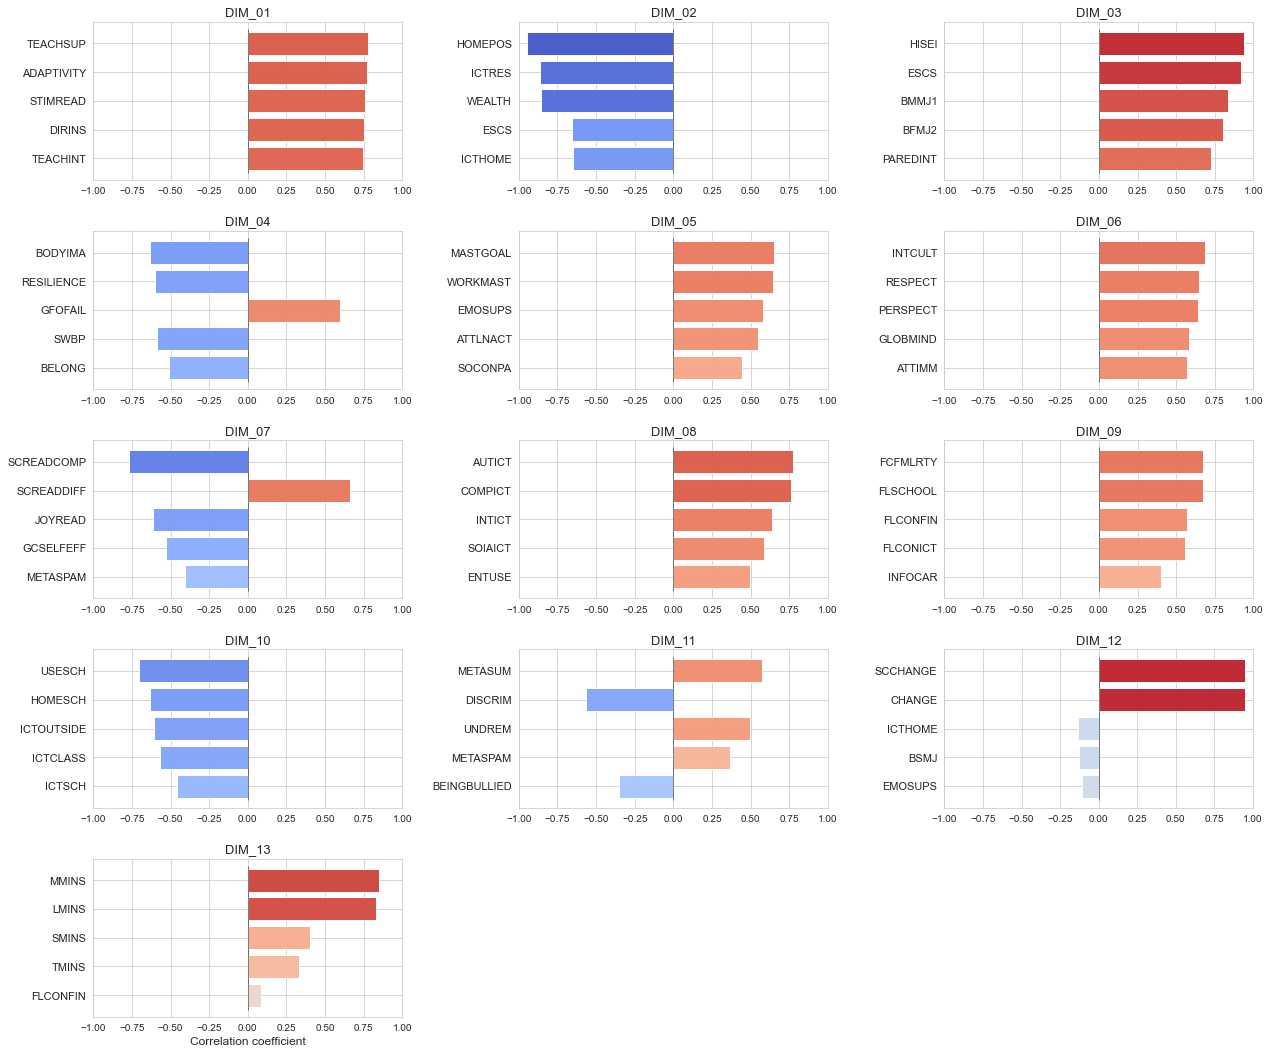

In [14]:
dr.plot_num_main_contributors(n_contributors=5) #, output_path='PATH.jpg')

In case we're interested in looking at one component in more detail, we can obtain its main conrobutors.

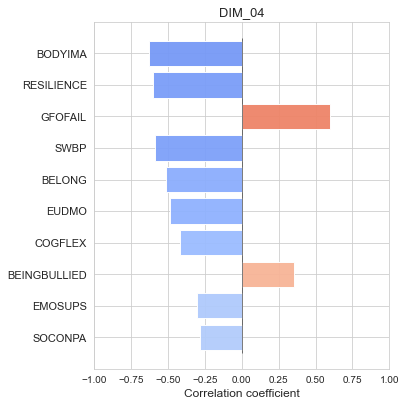

In [15]:
dr.plot_num_main_contributors(n_contributors=10, dim_idx=3) #, output_path='PATH.jpg')

For components extracted from categorical variables, we're interested in the original categorical variables with high partial eta squared coefficient values.

In [16]:
dr.cat_trans_

,dim_14
0,-0.2810
1,2.1147
2,0.7174
3,-0.4129
4,1.1164
...,...
4236,-0.2810
4237,1.3791
4238,0.7174
4239,-0.4129


In [17]:
dr.cat_components_

['dim_14']

In [18]:
dr.cat_main_contributors()

,component,var_name,corr_ratio
0,dim_14,REPEAT,0.6150
1,dim_14,IMMIG,0.5717


### 2.3. Dimensionality reduction evaluation

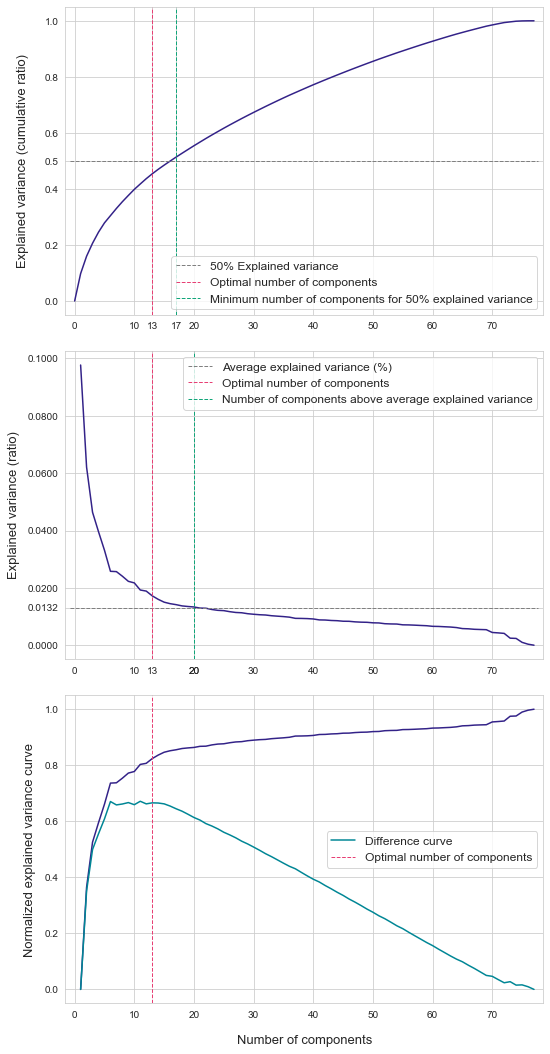

In [19]:
dr.plot_num_explained_variance(0.5) #, output_path='PATH.jpg')

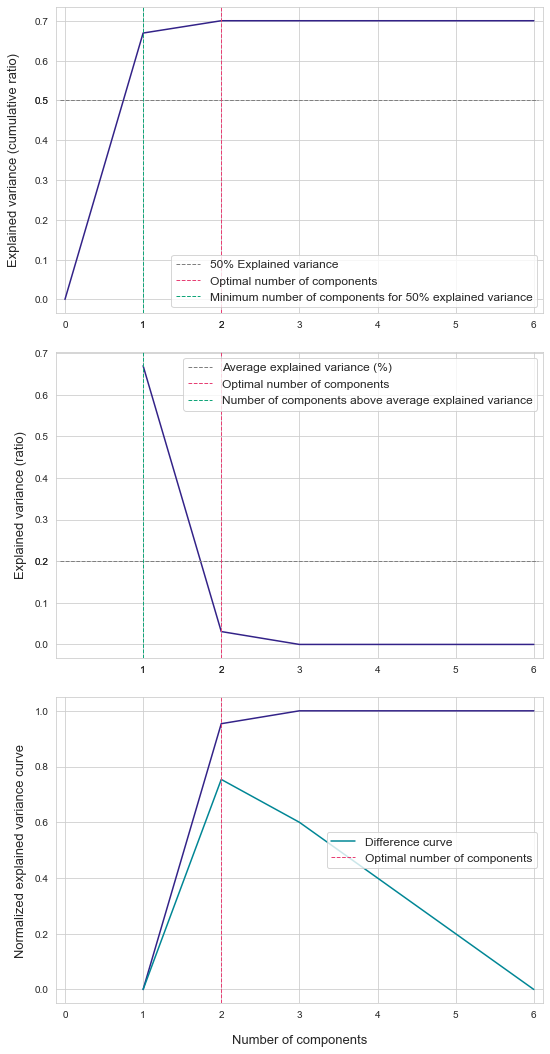

In [20]:
dr.plot_cat_explained_variance()

### 2.4. Advanced explainability of extracted components from categorical variables

The following table provides the component mean and std for every value of the original value. This is helpful to evaluate if the new component properly reflects the different values of the original categorical variables.

In [21]:
dr.cat_main_contributors_stats()

,component,var_name,var_value,component_mean,component_std
0,dim_14,REPEAT,0.0000,-0.2629,0.3320
1,dim_14,REPEAT,1.0000,0.9374,0.5585
2,dim_14,IMMIG,1.0000,-0.1583,0.4029
3,dim_14,IMMIG,2.0000,0.7960,0.4838
4,dim_14,IMMIG,3.0000,1.6805,0.5124


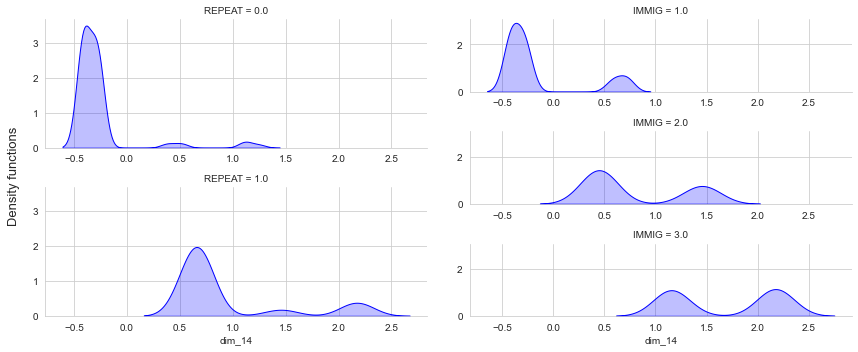

In [22]:
dr.plot_cat_main_contributor_distribution(dim_idx=0) #, output_path='PATH.jpg')

### 2.5. PCA vs SPCA 

The following plot compares the cumulative explained variance with PCA and SPCA (for the number of components calculated for SPCA). Note that unlike PCA, SPCA will generate a different first component when computing different numbers of components.

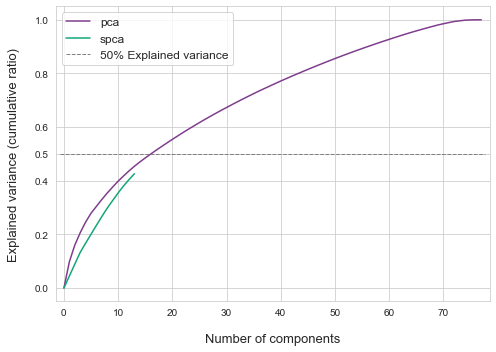

In [23]:
dr.plot_cumulative_explained_var_comparison(thres=0.5)

The following plot compares the coefficients of the second principal component obtained with PCA (green bars) and SPCA (pink points).

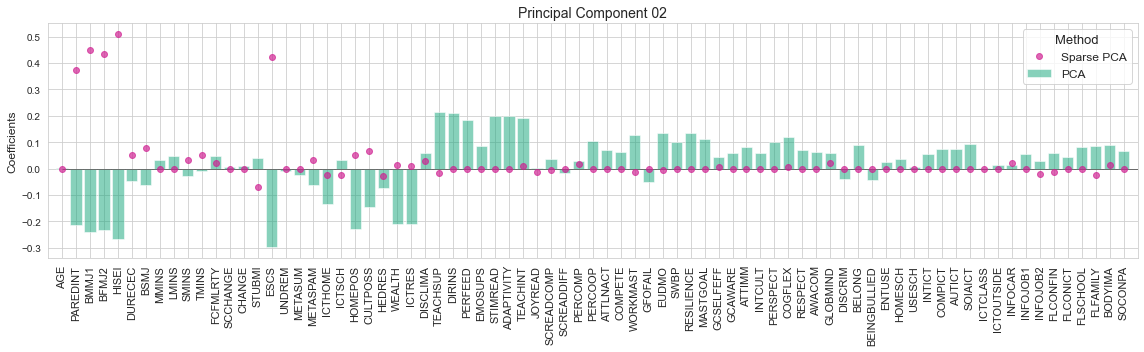

In [24]:
plot_compare_pca_based_components(dr.pca_.components_[1], dr.num_model.components_[1], num_vars, n_pc=2)

Export results.

In [25]:
# t.to_csv('../../data/pisa_spain_sample_v2_preprocessed_dim_red_output.csv', index=False)

## Reproducibility check

In [26]:
t_ref = pd.read_csv('data/pisa_spain_sample_v2_preprocessed_dim_red_output.csv')

check_df = t_ref.mean().to_frame(name='reference').merge(t.mean().to_frame(name='current_run'), left_index=True, right_index=True)
check_df['diff'] = np.abs(check_df['reference'] - check_df['current_run']) > 1e-6
print('Diff', check_df['diff'].sum())

Diff 0
